---
title: "Bewakoof Detector"
author: "Suchith Prabhu"
date: "2023-03-04"
jupyter: python3
image: "thumbnail.png"
sidebar: false

---
I trained this cool image classifier using the fastai library to mess with my friend who we both agree is bewakoof with directions.

In [28]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

!unset http_proxy
!unset https_proxy

The provided code snippet aims to resolve potential internet connectivity issues that may arise when using an internal network with a proxy. code snippet above is for bypassing internet issue that I got when using a internal network with proxy. 

We import the fastai library, which includes all the essential functions necessary to create the classifier.

In [2]:
from fastai.vision.all import *

# Load data

The directory path containing all the images of me and my friend is the result of my effort to collect images from my phone gallery and manually crop them to obtain only the images containing me or my friend. I created two images from one by cropping out the face.

In [22]:
PATH = Path("./bewakoof_detector/data/suchith_or_shivani/")

The image of my friend, Shivani, is provided below, @fig-shivani. She is referred to as "bewakoof" (meaning silly or foolish in Hindi) with the direction.

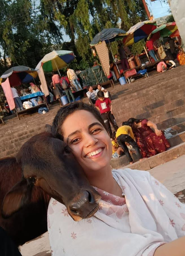

In [109]:
#| label: fig-shivani
#| fig-cap: Shivani

path = './bewakoof_detector/shivani.jpg'
Image.open(path).to_thumb(256, 256)

The following image, @fig-suchith, is of myself, referred to as "smart and pro with directions" and the "cool guy" at IIT Delhi.

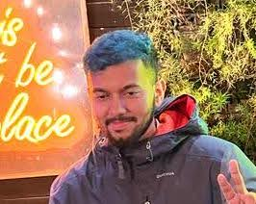

In [111]:
#| label: fig-suchith
#| fig-cap: Suchith

path = './bewakoof_detector/suchith.jpg'
Image.open(path).to_thumb(256, 256)

## Data cleaning

I wrote a custom code to create a widget that could rotate and save the manually cropped images since they were not saved correctly, and a few of them were rotated by some degrees.

In [31]:
#| code-fold: true

from ipywidgets import widgets
from IPython.display import display


files = get_image_files(PATH)

button_next = widgets.Button(description="Next")
button_pre = widgets.Button(description="Previous")
button_rotate_left = widgets.Button(description="Rotate left", icon="rotate-left")
button_rotate_right = widgets.Button(description="Rotate right", icon="rotate-right")

output = widgets.Output()

COUNTER = -1
IMAGE = None
MODIFIED = False

def button_next_eventhandler(obj):
    global IMAGE, COUNTER, MODIFIED
    
    if MODIFIED:
        IMAGE.save(files[COUNTER])
        MODIFIED = False

    COUNTER += 1
    output.clear_output()
    
    if COUNTER < len(files):
        IMAGE = Image.open(files[COUNTER])
        with output:
            display(IMAGE.to_thumb(256, 256))
    else:
        with output:
            display("ERROR::Buffer overflow.")
            
def button_rotate_left_eventhandler(obj):
    global IMAGE, COUNTER, MODIFIED
    
    output.clear_output()
    
    if COUNTER > -1 and COUNTER < len(files):
        MODIFIED = True
        IMAGE = IMAGE.rotate(90)
        with output:
            display(IMAGE.to_thumb(256, 256))
    else:
        with output:
            display("ERROR::Invalid counter value.")
                   
def button_rotate_right_eventhandler(obj):
    global IMAGE, COUNTER, MODIFIED
    
    output.clear_output()
    
    if COUNTER > -1 and COUNTER < len(files):
        MODIFIED = True
        IMAGE = IMAGE.rotate(-90)
        with output:
            display(IMAGE.to_thumb(256, 256))
    else:
        with output:
            display("ERROR::Invalid counter value.")
                     
def button_previous_eventhandler(obj):
    global IMAGE, COUNTER, MODIFIED
    
    if MODIFIED:
        IMAGE.save(files[COUNTER])
        MODIFIED = False
    
    COUNTER -= 1
    output.clear_output()
    
    if COUNTER > -1:
        IMAGE = Image.open(files[COUNTER])
        with output:
            display(IMAGE.to_thumb(256, 256))
    else:
        with output:
            display("ERROR::Buffer underflow.")
            
button_rotate_left.on_click(button_rotate_left_eventhandler)
button_rotate_right.on_click(button_rotate_right_eventhandler)
button_next.on_click(button_next_eventhandler)
button_pre.on_click(button_previous_eventhandler)
            

item_layout = widgets.Layout(margin="0 0 50px 0")

buttons = widgets.HBox([button_rotate_left, button_rotate_right, button_next, button_pre], layout=item_layout)

tab = widgets.Tab([output])
tab.set_title(0, 'Image')

dashboard = widgets.VBox([buttons, tab], layout=item_layout)

In [32]:
display(dashboard)

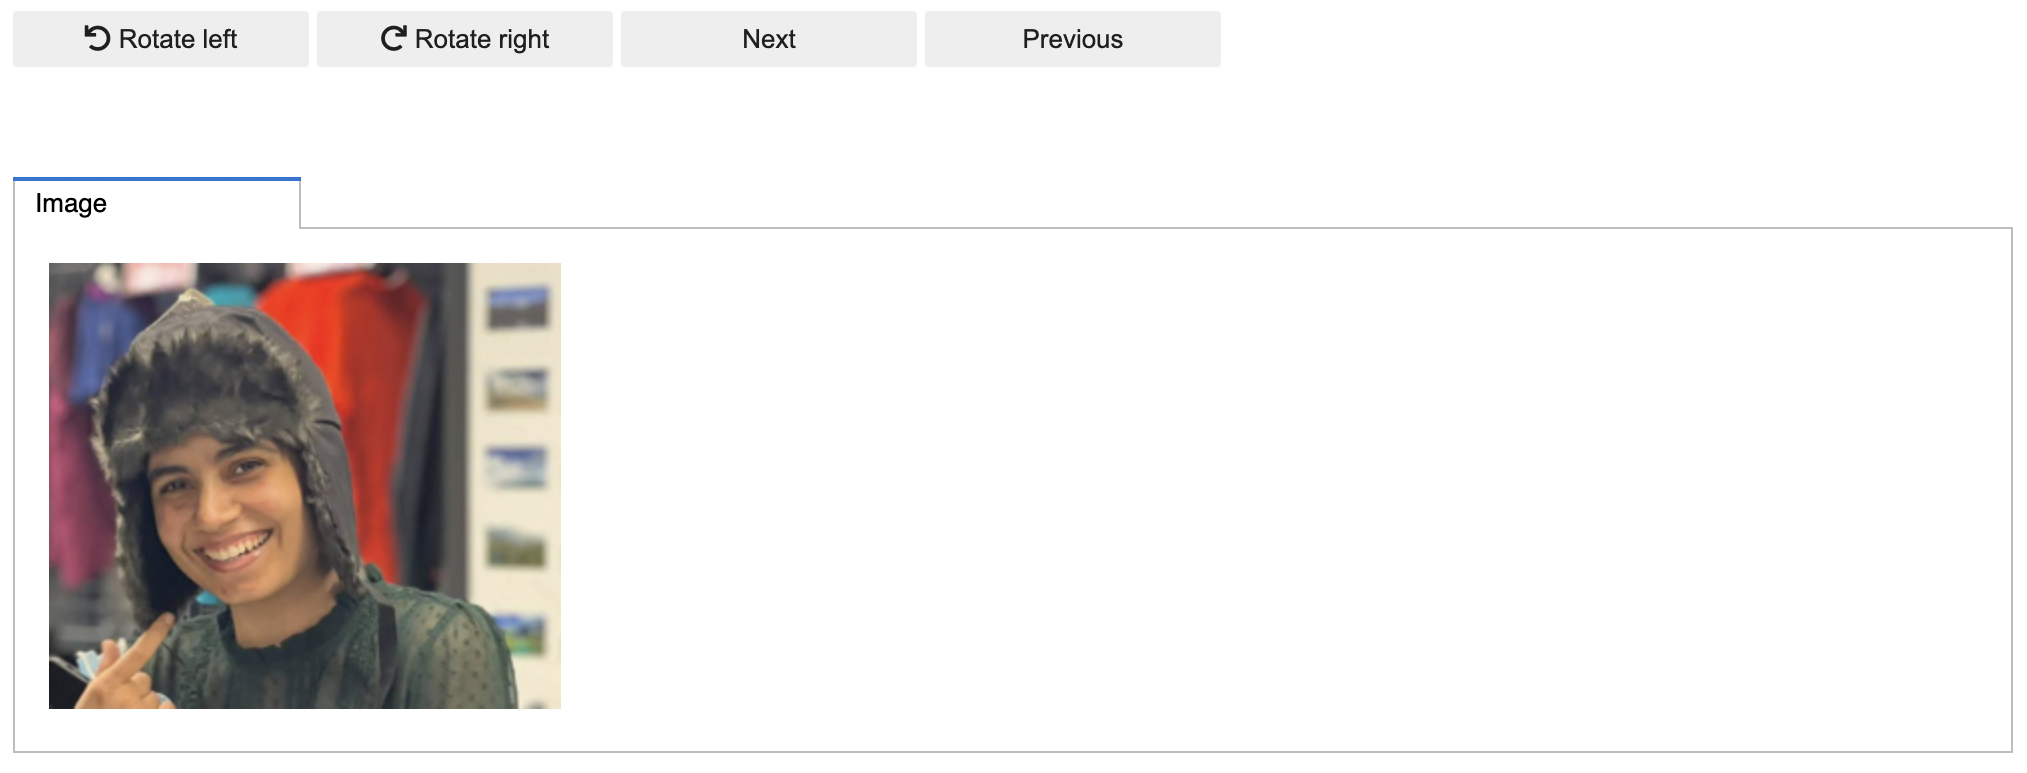

In [103]:
#| echo: False

Image.open("widget.png")

# Dataloader

The dataloader below is fed into the model to learn the weights of the classifier.

In [36]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(224, method='crop')]
).dataloaders(PATH)

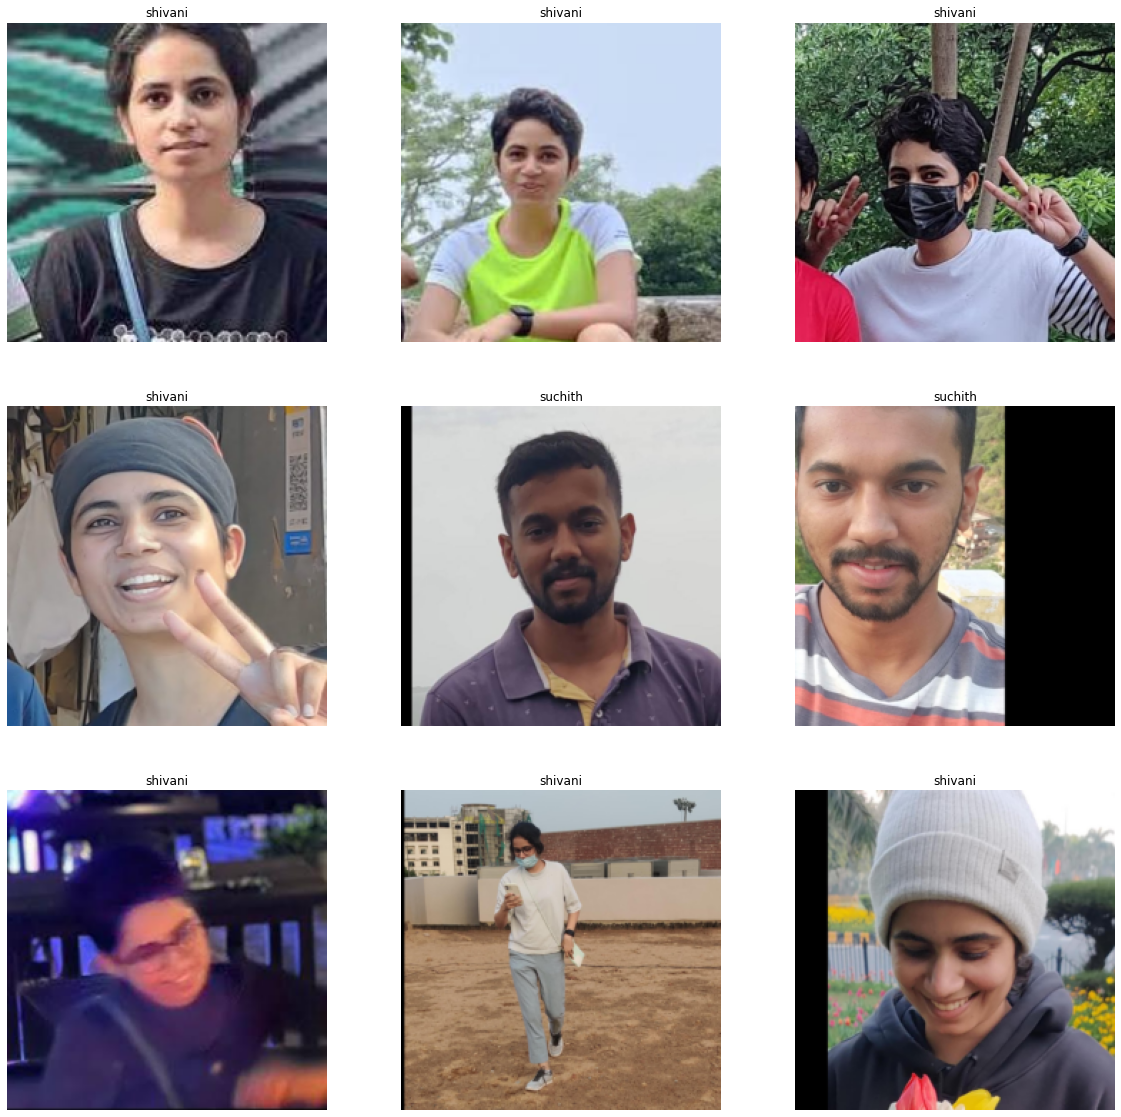

In [101]:
dls.show_batch(max_n=9, figsize=(20,20))

# Model

We will be fine-tuning the resnet34 model.

In [92]:
learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.256843,0.918047,0.416667,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.876068,0.843697,0.444444,00:06
1,0.823288,0.790361,0.388889,00:05
2,0.749693,0.638904,0.305556,00:05
3,0.623945,0.448487,0.194444,00:05
4,0.526806,0.328966,0.083333,00:05
5,0.456535,0.236890,0.027778,00:05
6,0.388769,0.198798,0.027778,00:05
7,0.349373,0.187475,0.027778,00:05
8,0.307049,0.179472,0.027778,00:06
9,0.280856,0.182338,0.027778,00:05


The learned parameters of the model are saved here.

In [ ]:
learner.export("./bewakoof_detector/suchith_or_shivani.pth")

# Prediction

We load the model to make predictions.

In [45]:
learner = load_learner("./bewakoof_detector/suchith_or_shivani.pth")

The function below employs the model to make predictions.

In [118]:
def predict(image):
    label, _, probs = learner.predict(image)
    dict_map = {'shivani': 'Bewakoof', 'suchith':'Smart'}
    
    display(image.to_thumb(256, 256))
    print(f"Detector output : {dict_map[label]}")
    print(f"The probability it is Shivani : {probs[0]}")
    

Finally, we provide a few predictions on the images using the trained model.

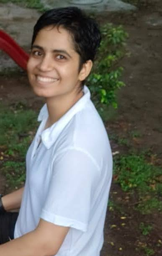

Detector output : Bewakoof
The probability it is Shivani : 0.9999760389328003


In [125]:
#| label: fig-shivani2
#| fig-cap: "Prediction for Shivani"
#| fig-subcap: [Shivani, prediction]
shivani = PILImage.create('./bewakoof_detector/shivani_2.jpg')
predict(shivani)

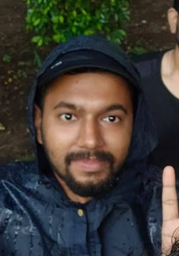

Detector output : Smart
The probability it is Shivani : 0.004921324085444212


In [127]:
#| label: fig-suchith2
#| fig-cap: Prediction for Suchith
#| fig-subcap : [Suchith, output]
suchith = PILImage.create('./bewakoof_detector/suchith_2.jpg')
predict(suchith)

# Conclusion

I hope this pisses her off and officially establishes that she is "Bewakoof" with the direction. I have created a [web app](https://huggingface.co/spaces/suchith720/bewakoof_detector) where you can upload your image to check if you bewakoof like her. Please feel free to try it out and share your thoughts.